<a href="https://colab.research.google.com/github/macauli10/TratamentodeDados/blob/main/TratamentoDadosipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importação, tratamento e analise de dados



importando bibliotecas

In [78]:
import pandas as pd
import numpy as np

Importando dataset


In [54]:
df = pd.read_csv('Data.csv')
df.head(100)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [55]:
df.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


Renomeando as Colunas


In [56]:
print(df.columns)

Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')


In [57]:
df = df.rename(columns={
    'Country': 'pais',
    'Age': 'idade',
    'Salary': 'salario',
    'Purchased': 'comprado'
})


In [58]:
print(df.columns)

Index(['pais', 'idade', 'salario', 'comprado'], dtype='object')


In [59]:
df.shape

(10, 4)

In [60]:
df.head()

,pais,idade,salario,comprado
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


Verificação de numeros nulos

In [61]:
df.isnull().sum()

,0
pais,0
idade,1
salario,1
comprado,0


Trocando valores nulos pela media ou mediana

In [62]:
print(df.columns)


Index(['pais', 'idade', 'salario', 'comprado'], dtype='object')


In [63]:
df.isnull().sum()

,0
pais,0
idade,1
salario,1
comprado,0


In [64]:
df.fillna(df.mean(numeric_only=True), inplace=True)


In [66]:
df.isnull().sum()

,0
pais,0
idade,0
salario,0
comprado,0


In [67]:
df.shape

(10, 4)

In [68]:
df.describe()

,idade,salario
count,10.000000,10.000000
mean,38.777778,63777.777778
std,7.253777,11564.099406
min,27.000000,48000.000000
25%,35.500000,55000.000000
50%,38.388889,62388.888889
75%,43.000000,70750.000000
max,50.000000,83000.000000


Removendo duplicatas


In [69]:
df.duplicated().sum()

np.int64(0)

In [70]:
df = df.drop_duplicates()


Salvando dataframe tratado

In [71]:
df.to_csv('/content/dados_tratados.csv', index=False)


In [72]:
from google.colab import files
files.download('/content/dados_tratados.csv')  # Baixa o arquivo CSV


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Analisando se há relação entre idade e Salario

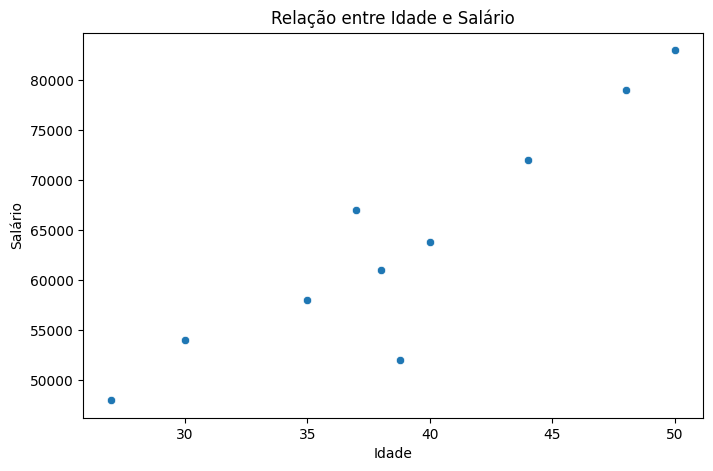

In [74]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='idade', y='salario', data=df)
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.title('Relação entre Idade e Salário')
plt.show()


Grafico de distribuição dos salarios

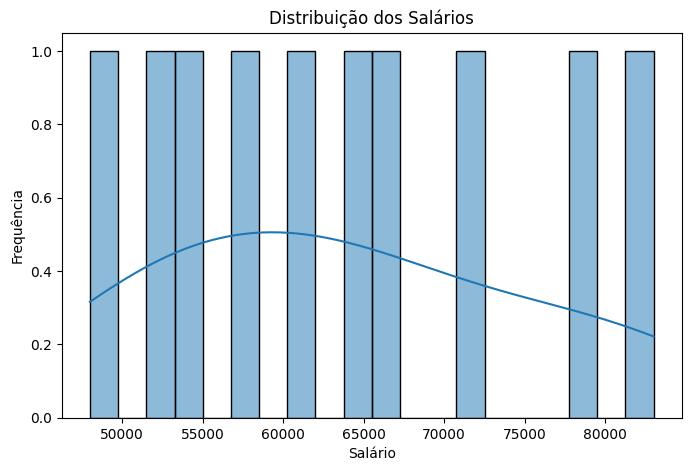

In [75]:
plt.figure(figsize=(8, 5))
sns.histplot(df['salario'], bins=20, kde=True)
plt.xlabel('Salário')
plt.ylabel('Frequência')
plt.title('Distribuição dos Salários')
plt.show()
